In [2]:
library(ggplot2)


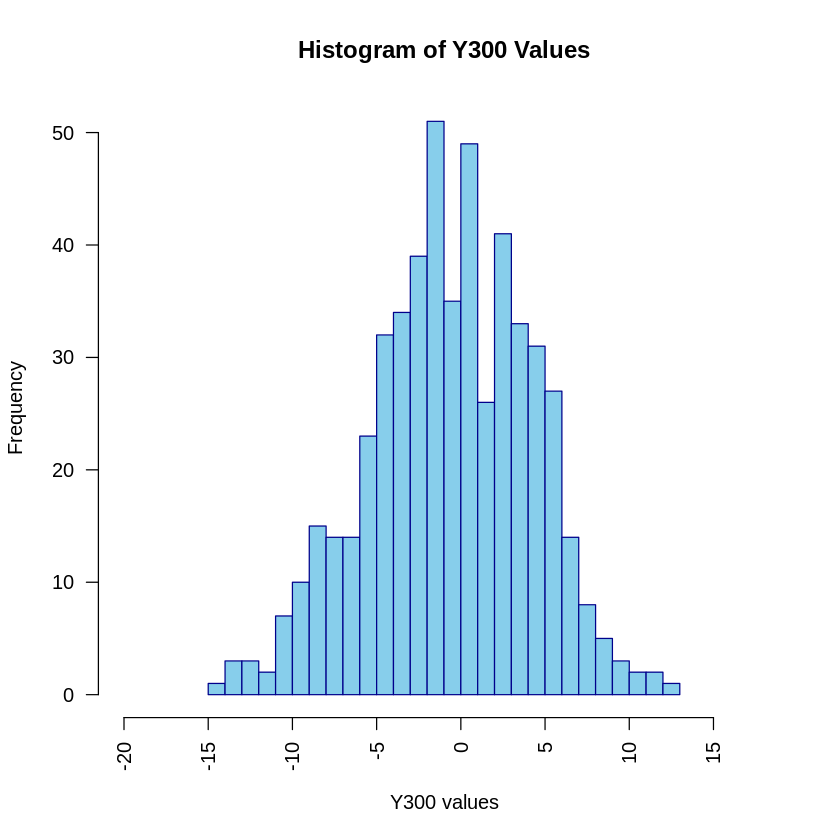

In [5]:
# Reading the CSV file into a data frame
df <- read.csv("Baseline Investigation Data.csv")

# Define the number of bins and axis limits based on the data
num_bins <- 30
x_axis_limits <- c(min(df$y300) - 5, max(df$y300) + 5) # Adjust limits based on data

# Creating a histogram with specified x-axis range, more bins, and labels
hist(df$y300,
     breaks = num_bins, # Increased granularity with more bins
     main = "Histogram of Y300 Values",
     xlab = "Y300 values",
     ylab = "Frequency",
     col = "skyblue", # Aesthetic fill color for the bins
     border = "darkblue", # Aesthetic border color for the bins
     las = 1, # Horizontal axis labels for readability
     xlim = x_axis_limits, # Dynamically set x-axis limits based on data
     xaxt = 'n') # Remove default x-axis ticks for customization

# Custom x-axis ticks, ensure the range and interval are appropriate
ticks <- seq(x_axis_limits[1], x_axis_limits[2], by = 5) # Adjust 'by' for suitable intervals
axis(1, at = ticks, labels = format(ticks, nsmall = 0), las = 2) # Apply custom ticks


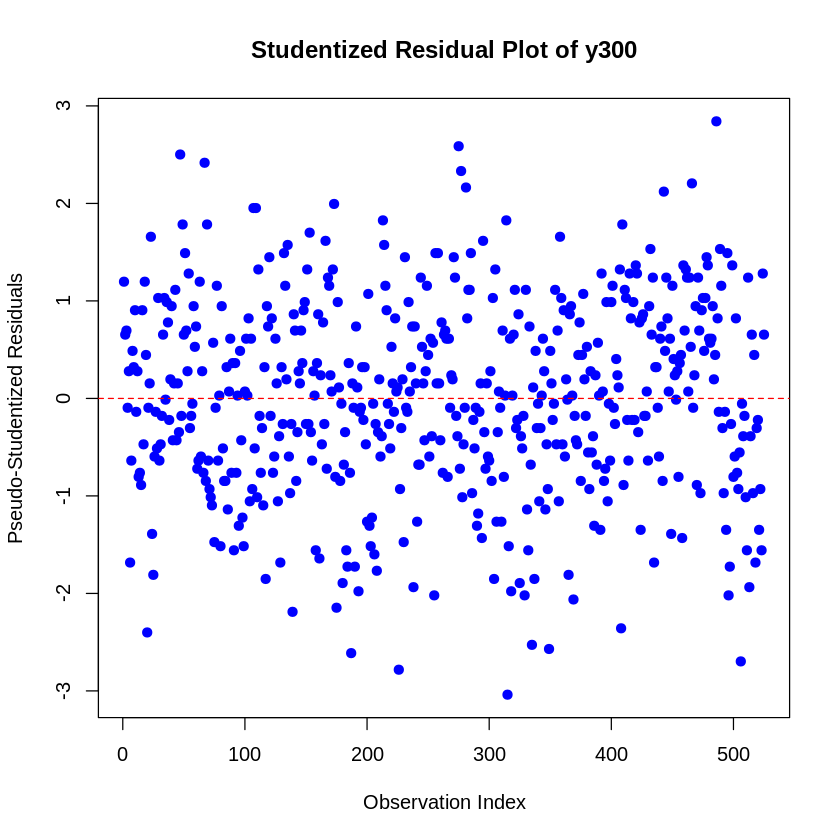

In [7]:
# Assuming df is your data frame and y300 is the column of interest
y <- df$y300

# Precompute values used in the loop to avoid redundant calculations
n <- length(y)
y_sum <- sum(y)
y_sum_of_squares <- sum(y^2)

# Function to calculate leave-one-out variance
loo_var <- function(i) {
  loo_sum <- y_sum - y[i]
  loo_sum_of_squares <- y_sum_of_squares - y[i]^2
  loo_mean <- loo_sum / (n - 1)
  (loo_sum_of_squares - (n - 1) * loo_mean^2) / (n - 2)
}

# Calculate pseudo-studentized residuals
studentized_residuals <- numeric(n) # Preallocate the vector for efficiency
for (i in 1:n) {
  loo_var_i <- loo_var(i)
  studentized_residuals[i] <- (y[i] - (y_sum - y[i]) / (n - 1)) / sqrt(loo_var_i)
}

# Plot the pseudo-studentized residuals
plot(studentized_residuals,
     ylab = "Pseudo-Studentized Residuals",
     xlab = "Observation Index",
     main = "Studentized Residual Plot of y300",
     pch = 19, col = "blue")
abline(h = 0, col = "red", lty = 2)



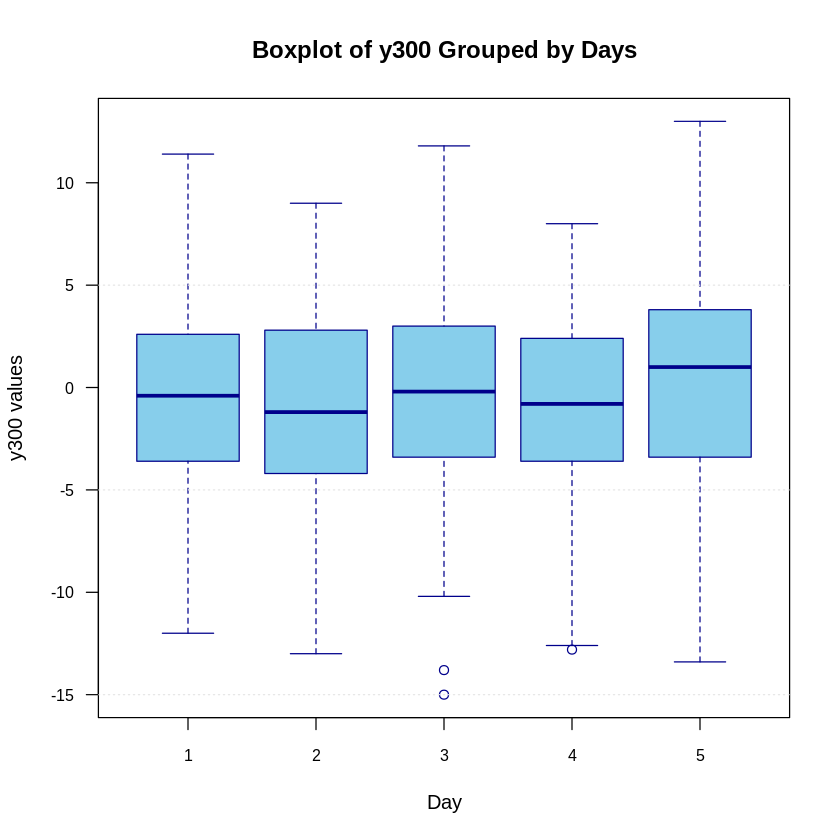

In [8]:
# Boxplot of y300 grouped by daycount
boxplot(y300 ~ daycount, data = df,
        main = "Boxplot of y300 Grouped by Days",
        xlab = "Day",
        ylab = "y300 values",
        col = "skyblue",            # Fill color for the boxes
        border = "darkblue",        # Border color for the boxes
        notch = FALSE,              # Notch the boxplot to indicate confidence interval around the median, if needed
        outline = TRUE,             # Show outliers
        las = 1,                    # Orient axis labels horizontally
        varwidth = TRUE,            # Variable width of the boxes to represent the number of observations
        cex.axis = 0.8,             # Scale down axis labels for better fit
        cex.lab = 1,                # Scale for x and y labels
        cex.main = 1.2)             # Scale for the main title

# Enhance the plot with grid lines for better readability
abline(h = seq(min(df$y300), max(df$y300), by = 10), col = "gray90", lty = "dotted")



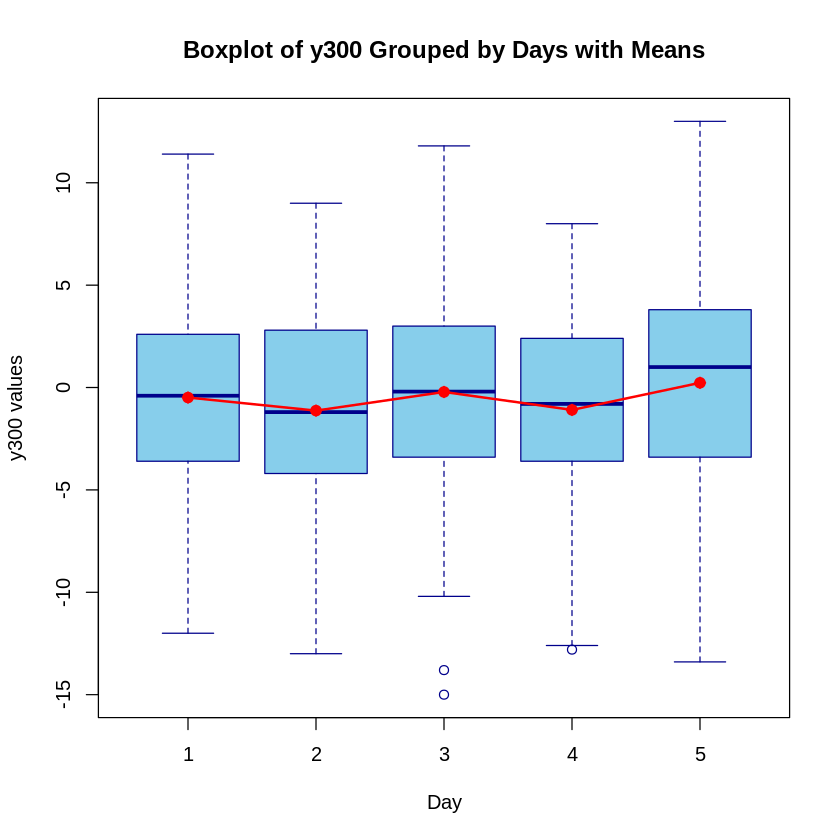

In [13]:
# Create the boxplot and store its statistics
bp <- boxplot(y300 ~ daycount, data = df,
              main = "Boxplot of y300 Grouped by Days with Means",
              xlab = "Day", ylab = "y300 values",
              col = "skyblue", border = "darkblue")

# Calculate group means using aggregate, ensuring alignment with boxplot groups
group_means <- aggregate(y300 ~ daycount, data = df, FUN = mean)

# Match the group means with their corresponding boxplot positions
# Use the names from group_means to match against bp$names, then extract the positions
mean_positions <- match(group_means$daycount, bp$names)

# Add the means as points, ensuring 'x' and 'y' lengths match
points(mean_positions, group_means$y300, pch = 23, col = "red", bg = "red")

# Connect the means with a line, using the same matched positions
lines(mean_positions, group_means$y300, type = "o", col = "red", lwd = 2)



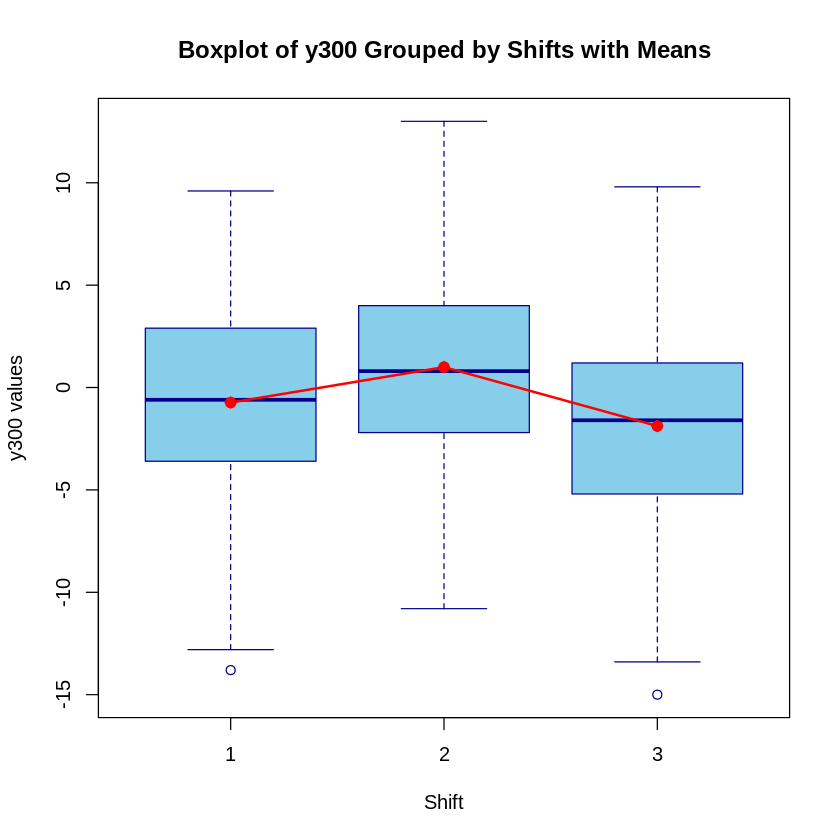

In [14]:
# Create the boxplot and store its statistics for accurate mean points positioning
bp <- boxplot(y300 ~ shift, data = df,
              main = "Boxplot of y300 Grouped by Shifts with Means",
              xlab = "Shift", ylab = "y300 values",
              col = "skyblue", border = "darkblue")

# Calculate group means using tapply, directly aligned with boxplot groups
group_means <- tapply(df$y300, df$shift, mean)

# Ensure the group means are ordered according to the boxplot's group names
ordered_means <- group_means[bp$names]

# Add the means as points using the boxplot statistics for accurate positioning
# bp$group provides the numeric positions, but we ensure ordering with bp$names
points(1:length(ordered_means), ordered_means, pch = 23, col = "red", bg = "red")

# Connect the means with a line for visual trend analysis
lines(1:length(ordered_means), ordered_means, type = "o", col = "red", lwd = 2)


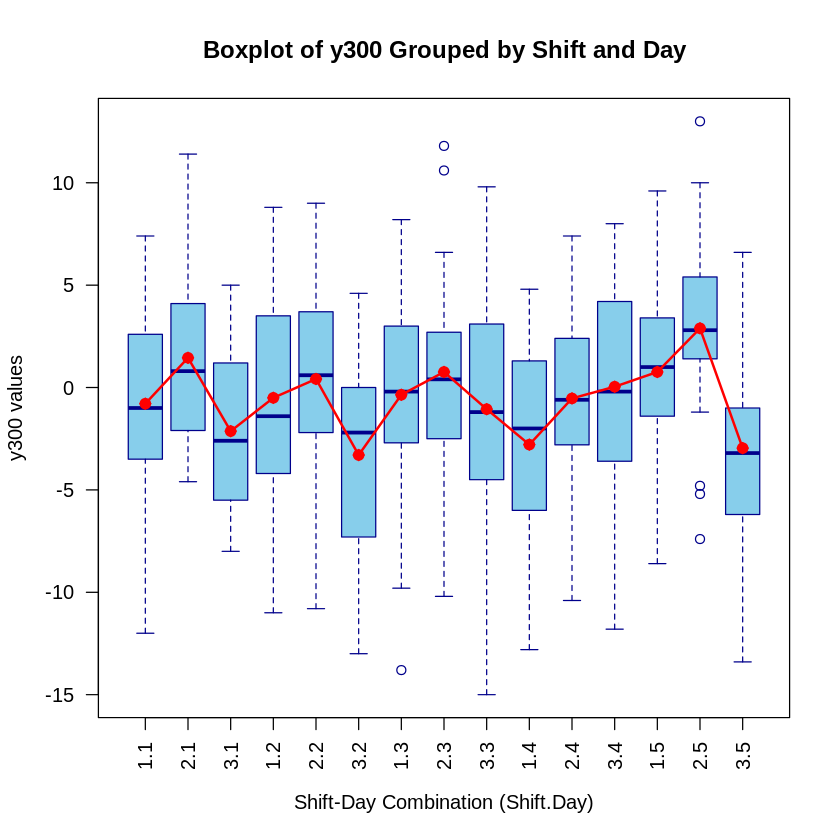

In [15]:
# Step 0: Create an interaction term between 'shift' and 'daycount'
df$interaction <- interaction(df$shift, df$daycount)

# Step 1: Calculate group means for each combination of 'shift' and 'daycount'
group_means <- tapply(df$y300, df$interaction, mean)

# Step 2: Create the boxplot grouped by the interaction term
bp <- boxplot(y300 ~ interaction, data = df,
              main = "Boxplot of y300 Grouped by Shift and Day",
              xlab = "Shift-Day Combination (Shift.Day)", ylab = "y300 values",
              col = "skyblue", border = "darkblue", las = 2)

# Ensure the group means are ordered according to the boxplot's group names (interaction levels)
ordered_means <- group_means[bp$names]

# Step 3: Add the means as points
# The x-coordinates for the points are the numeric positions of each group in the boxplot
points(x = 1:length(ordered_means), y = ordered_means, pch = 23, col = "red", bg = "red")

# Step 4: Connect the means with a line
lines(x = 1:length(ordered_means), y = ordered_means, type = "o", col = "red", lwd = 2)



In [18]:
# Assuming df is your dataset
summary_stats <- summary(df$y300)

# Constants for USL (Upper Specification Limit) and LSL (Lower Specification Limit)
USL <- 10
LSL <- -10

# Calculate mean and standard deviation directly
mean_value <- mean(df$y300, na.rm = TRUE)  # Ensure to handle NA values if present
sd_value <- sd(df$y300, na.rm = TRUE)      # Ensure to handle NA values if present

# Directly calculate Ppk
Ppk_value <- min((USL - mean_value) / (3 * sd_value), (mean_value - LSL) / (3 * sd_value))

# Create a data frame to display the statistics including Ppk
table_data <- data.frame(
  Statistic = c("Minimum", "Maximum", "Mean", "Median", "Standard Deviation", "PPK"),
  Value = c(summary_stats[1], summary_stats[6], mean_value, summary_stats[3], sd_value, Ppk_value)
)

# Print the table
print(table_data)




           Statistic       Value
1            Minimum -15.0000000
2            Maximum  13.0000000
3               Mean  -0.5394286
4             Median  -0.4000000
5 Standard Deviation   4.8054743
6                PPK   0.6562357
